# *Topic modeling with Top2vec *

# installation+librairies

In [ ]:
pip install top2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.1 MB/s 
     |████████████████████████████████| 88 kB 10.5 MB/s 
     |████████████████████████████████| 5.2 MB 64.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.1 MB 63.0 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2340262 sha256=84451bc40ac874b8fdea6af0466897dec4bc42b9aeba5d4b1925537698393813
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=316a94ad7c55f64f5c2569a96c1ba2ec7a7332df25aa9cb31fbeafc4ec2ffd4f
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Crea

In [ ]:
from top2vec import Top2Vec
import pandas as pd
import pickle
from gensim import matutils, models
import scipy.sparse

In [ ]:
data = pd.read_pickle('pickel_final.pkl')
data.dropna()
data["sous_titre"]

0      ami jesper aller souhaite nouveau aventure cha...
1      ricardo simulateur dagriculture 2022 canola lu...
2      champ pomme terr jaim partager gar faitesvous ...
3      pouvoir commencer tour 90 laissezle sortezle t...
4      mappelle michel hesselbach directeur general e...
                             ...                        
171    avoir ferme aimeriez fonctionnalité sil plaire...
172    semaine machine pete tv travail sol bloc dench...
173    kate voisin steve montrer héro cool apprendr s...
174    tracteur roue motoculteur terme générique état...
175    merveilleux excité cèdre ensemencement semoir ...
Name: sous_titre, Length: 176, dtype: object

In [ ]:
final = ['estce','content','peutetr','etre','monsieur' ,'coup', 'chain', 'dici' ,'lun', 'bel','questce','lanne','lannee','wow',"quune",'gar','ouai', 'questc' ,'etre', 'ya' ,'plaisir' ,'famille', 'vie' ,'episode' ,'histoire', 'nla' ,'detr' , 'ben' ,'voyage', 'davoir' , 'dire' ,'parcell' , 'cm', 'cause','jen','javai','grac','assurezvous' ,'bouton', 'jaim' , 'truc'  ,'certainement', 'laba'  ,'journe','egalement', 'jusqua', 'ceuxci','dhiver', 'lavon' ,'celuici' 
 ,'presque', 'mois' ,'voiture','sen' , 'davoir','demain', 'derniere'  ,'justement' ,'pret' ,'certainement' ,  'veux',  'essentiellement', 'dernier', 'salete' , 'accord' ,'feu' ,'ligne', 'difficile', 'cetait', 'musiqu','nont', 'tard', 'demander', 'fait','meilleur' ,'penser' ,'lourd', 'cas' ,'equipe' ,'perdre', 'interesser', 'semaine', 'eleve' ,'autant' ,'mieux' ,'raison','commence' , 'voyon', 'fonction' ,'expliquer' , 'point' ,'choisir',  'present' ,'cours','main' ,'ceter',  'bientot', 'partout','leger' , 'parler' , 'per', 'tete', 'grandper' 'droite' 'tourner', 'voitur', 'devoir', 'coin','dejeuner',  'apprendre' 'courir' 'probablement' , 'lautr', 'navez', 'arriere', 'sort', 'lheur', 'enorm', 'genial' ,'neter', 'ta' ,'vite' ,'troisieme','veux', 'dernier', 'cetait' ,'genre','probleme', 'travaille' ,'quen' ,'rapidement', 'lieu' ,'dautre' ,'permettre', 'dune' ,'personne' ,'effectivement' ,'demande', 'cestadir' ,'fort' ,'client','avantage' ,'dun', 'connaitre' ,'condition' ,'achete', 'nont'
 'niveau', 'lensembl' ,'donne', 'bas' , 'compte' ,'region', 'sil', 'valeur', 'manier' ,'plupart' ,'bon', 'daller', 'neuf' ,'projet', 'demander', 'lepoqu', 'chercher' ,'terme', 'remorqu', 'facilement', 'autant','rien', 'oncle', 'kate', 'chri', 'colline','combiner' ,'radio' ,'chariot' ,'doi', 'vien', 'assurer','arreter', 'papa' , 'absolument', 'larriere', 'cool' , 'voitur', 'coin' ,'per', 'virage' ,'reservoir', 'tourn' ,'rocher', 'devoir' ,'dejeuner' ,'voler'
  'poindre', 'asseoir' ,'section' , 'nai' ,'jespere', 'incroyable','loin','fou' ,'terminer', 'vert',  'sai',"aujourdhui" ,"©" ,"épisode","bref","salut" ,"abonner" ,"aller" ,"ami" ,"an" ,"annee" ,"arriver" ,"aventure" ,"avoir" ,"bar" ,"ete" ,"etre" ,"jai" ,"euh","exemple" ,"experience" ,"unique" ,"facon" ,"faire" ,"falloir" ,"grand" ,"gã" ,"heure" ,"ici","important" ,"jamais" ,"jusqua" ,"systeme" ,"jesper" ,"jeune" ,"jour" ,"jusqua" ,"magnifique" ,"matin" ,"mauvais","mavoir" ,"moment" ,"musique" ,"nhesiter" ,"nouveau" ,"ny" ,"nã" ,"oui" ,"sest" ,"partie" ,"patron" ,"pere" ,"petit" ,"pouvoir" ,"pouvoir" ,"arrive" ,"premier" ,"prochain" ,"propose" ,"question" ,"quil" ,"quils" ,"rout" ,"salut" ,"savoir" ,"sortir" ,"sud" ,"sued" ,"suite" ,"suivre" ,"temps" ,"the" ,"travail" ,"travailler" ,"trop" ,"très" ,"tuba" ,"venir" ,"video" ,"vidéo" ,"vlog" ,"voi" ,"voila" ,"voir" ,"prendre" ,"vouloir" ,"vraiment"]


In [ ]:
def remove_stopwords(text):
  ###print(len(final_stopwords_list))

 result = []
 new_text = ""
 for token in str(text):
   if str(token) not in add_stop_words:
      #print(token)
     
      result.append(token)
   new_text = "".join(result)
    #print(new_text)
 return new_text
data['new'] = data['sous_titre'] .apply(remove_stopwords)

In [ ]:
corpus[0]

'dieu exalte puissance majestueux cieux raconter grandeur letendu manifeste merveilleux creation cesser nuit connaitr creer cieux dieu crea terre poussier sol creer lhomme insuffla narine souffl dieu damour creer lhomm femme ressemblance être relation commencement reveraient honoraient dieu vivaient harmonie être jusquau satan tenter femme manger fruit defendu donner lhomm manger letr humain rebeller dieu suivit chemin peche letre humain être separ dieu jet jardin deden dieu aimer letre humain naver souhaite separ creation dieu pourraitil saint source justic juger letre humain pech livre saint dieu revele plan sauver jugement abraham être lun decouvrir plan abraham homme dieu promesse benir descendant sable etoile ciel obeissance lepreuv dieu abraham sacrifier fils offrand abraham confiance dieu chercha obeir lever couteau tuer fil langer seigneur larreta vit quabraham craindre dieu obeir abraham belier retenir corne buisson sacrifia place fil offrande dieu dieu montrer abraham agneau 

In [ ]:
model = Top2Vec(documents= corpus, speed="learn", workers=8)

2022-09-05 13:09:25,007 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2022-09-05 13:09:25,374 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-09-05 13:09:27,887 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-09-05 13:09:29,827 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-09-05 13:09:29,841 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
model.get_num_topics()

2

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(2)
print("les topic words " , topic_words)
print("les word_score",word_scores)
print("topic_nums",topic_nums)
 

les topic words  [['besoin' 'connaitre' 'ensembl' 'pratique' 'force' 'charge' 'net'
  'gagner' 'chance' 'generation' 'preparer' 'vue' 'lagricultur' 'niveau'
  'beaucoup' 'donner' 'zone' 'laisse' 'larger' 'dabord' 'kilometre'
  'comprendre' 'surfac' 'faible' 'genr' 'aide' 'travers' 'garder'
  'fonctionne' 'principal' 'commencer' 'remettre' 'larrier' 'cheval'
  'deau' 'montrer' 'continue' 'machine' 'rester' 'saison' 'autour'
  'exploitation' 'pays' 'ferme' 'laver' 'magasin' 'parcelle' 'tot'
  'creer' 'couche']
 ['vider' 'tariere' 'ralentir' 'grandper' 'finir' 'ramasser' 'entete'
  'conduire' 'grain' 'regarder' 'tour' 'camion' 'voler' 'droite'
  'remplir' 'darcy' 'passage' 'tourner' 'continue' 'vitesse'
  'completement' 'couper' 'momer' 'poindre' 'sac' 'chemin' 'descendre'
  'bord' 'batteus' 'gauche' 'courir' 'regarde' 'sorte' 'heureux' 'champ'
  'milieu' 'super' 'droit' 'deplacer' 'paille' 'voyez' 'terrain' 'train'
  'suppose' 'recolte' 'laver' 'moissonneuse' 'rapide' 'tige' 'continuer']

In [ ]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["semoir"], num_topics=2)

In [ ]:
print(topic_nums , topic_scores, topic_nums)

[0 1] [0.41811243 0.0477981 ] [0 1]


*We are going to search for topics most similar to semoir*


In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["semoir"], num_topics=3)

In [ ]:
print(topic_nums , topic_scores, topic_nums)

[2 1 0] [ 0.55250455  0.33225002 -0.06537535] [2 1 0]


**Generate Word Clouds**

*Using a topic number you can generate a word cloud. We are going to generate word clouds for the  most similar topics to semoir  topic search from above*

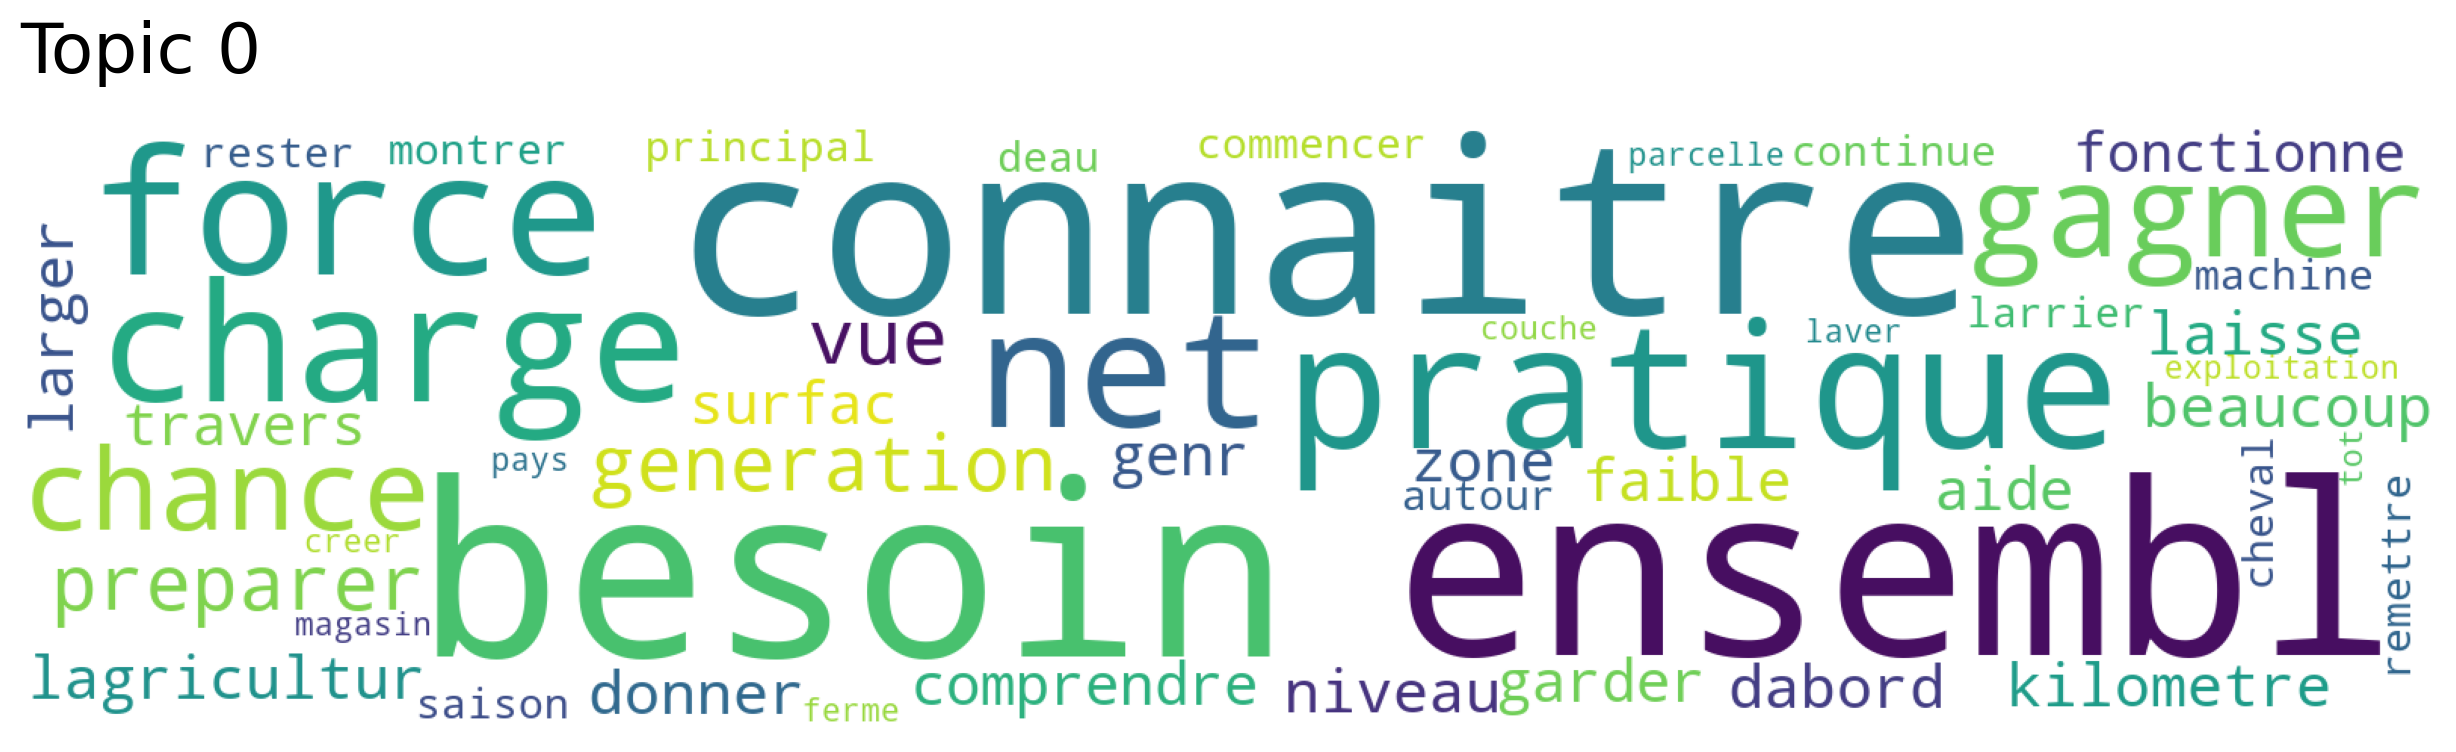

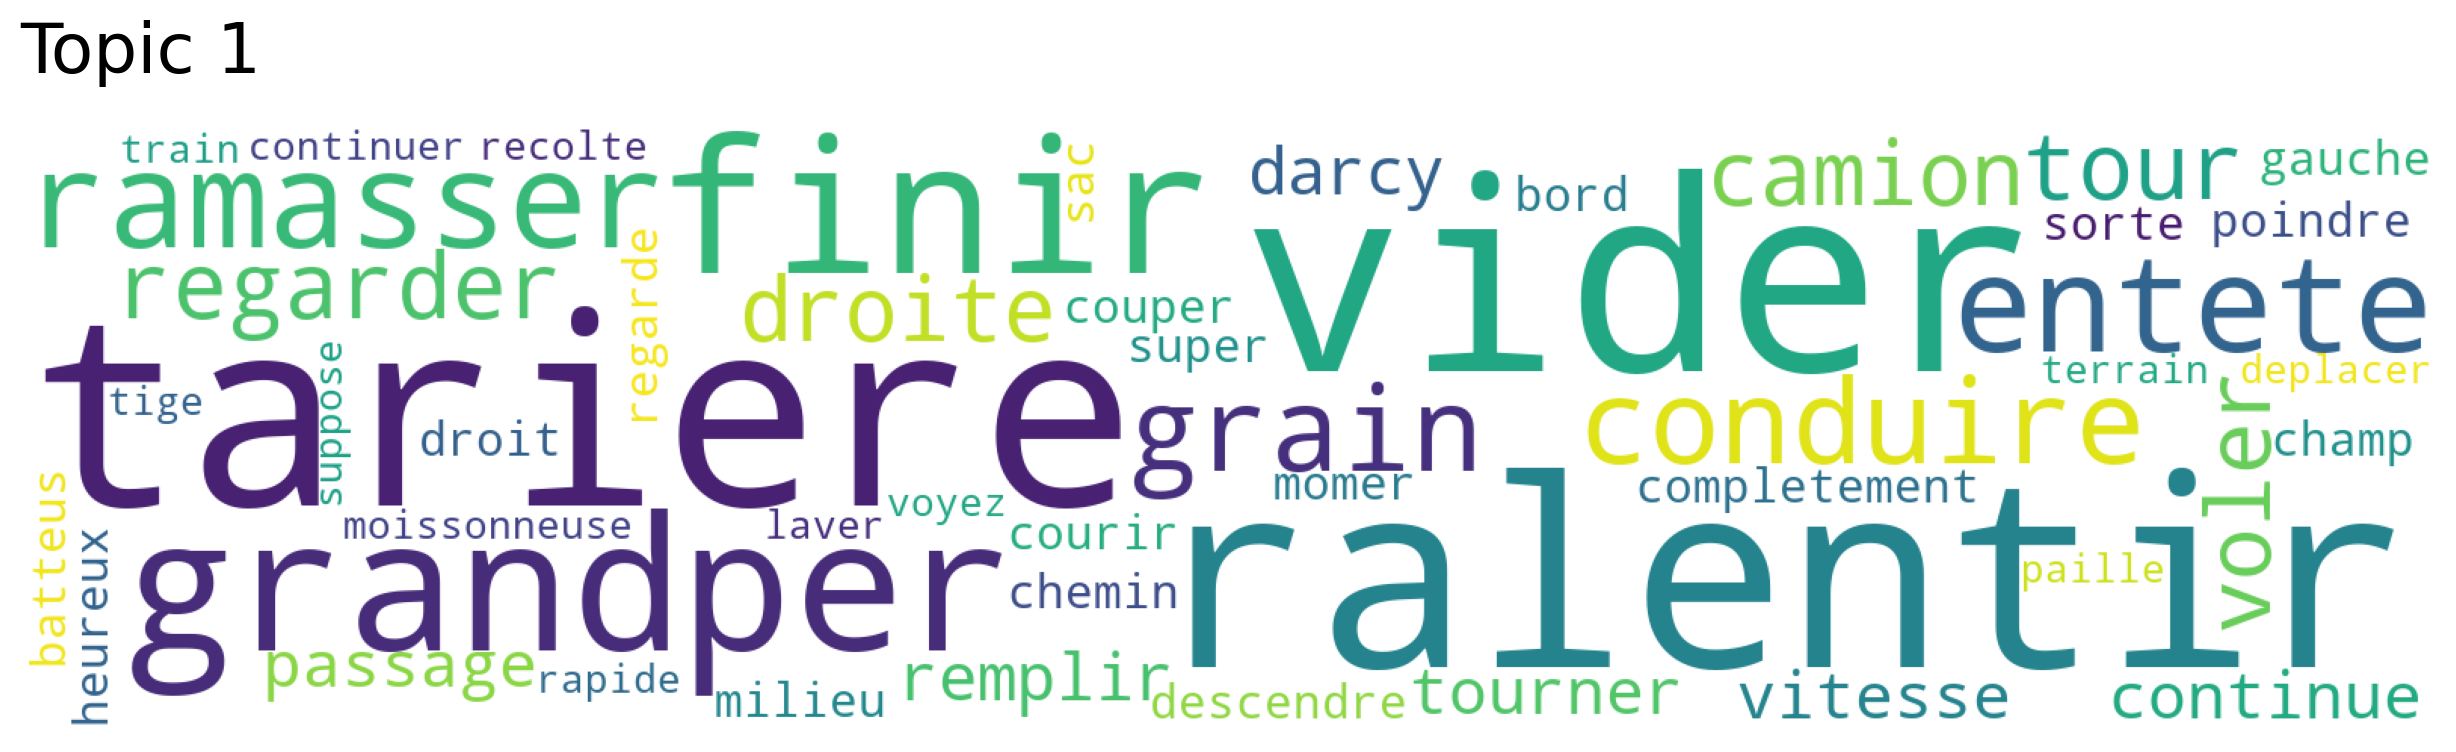

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["semoir"], num_topics=2)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic,background_color="white")
   

**Search Documents by Topic**

We are going to search by topic 2, the most  topic that appears to be about our dictionary


In [ ]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=1, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print(doc)
    print("-----------")
    print()

Document: 92, Score: 0.8502933382987976
olivier vivre plante condition remplir arbr prosper cultiver plante olive enfance maturit connaitre astuce agriculteur utilisent cultiver delicieux fruit huile regardez guide determinez culture olive region culture olive prosperer mieux climat hiver dou ete long sec verifiez sol ajuster necessair sol moderement acide moderement basique superieur inferieur agriculteur pensent ideal recherchez zone drainage trouvez zone expose soleil plein soleil ombr bloquant arbre ideal zone choisir devoir beneficier ensoleillement direct heure jour commencez arbre pot achetez oliviers pot lign serre local graine fragile difficile cultiver devoir planter arbre haut branche commencent pied remplissez trou utilisez sol precedemment creux sol environner remplir trou mettre pouc terre vegetal mott raciner heure actuel element engrais compost devoir ajoute arbr arbr devoir sortir sol natal arrosez pailler zone paille paillis utilise place paille grossier lucern sojer 

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=0, num_docs=8)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print(doc)
    print("-----------")
    print()

Document: 54, Score: 0.7774413824081421
ete arrive champagne region viticole programme vrai trop programm interesser coup heu vrai sujet elevage dindon il jamais diffuser rire villag dormans departement reveille arrive champagne apprete vivre vigneron attendre bonhomme non surprise plein milieu champagne Monsieur betouzet Monsieur betouzet prepar surprise jamais vie toc toc toc anthony jerome guillaum Monsieur champagne annnee vrai actuellement conversion biologique centralis endroit centralis batiment rentre raisin batiment sort bouteille chance flamber neuf endroit strategiqu batiment quer raisin arrive raisin vendange vigne pes raisin marc raisin correspondre pressoir super moderne epoqu pied pied nus tonneal carrement membrane pressoir gonfler membrane ecrase raisin contre parois cylindr peau pepin rafle raisin tomber bac jett non jett evacu distillerie transformer gnole alcool fort champagne exception decouvrir cuve flambant neuf attention main propre previen whouer effectivement 

**Search Documents by Keywords**

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["tracteur"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print(doc)
    print("-----------")
    print()

Document: 7, Score: 0.7828904390335083
salutation être revendeur cas pologne presenteron tracteur modele puma cv affaire ete jerome cas batteus separ grain jerome cas invent tracteur travailler aide cheval publiee premier monde pret moteur vapeur attendre modele tard rouge bas puissance combine tracteur ami simplement imaginer neige pluie choix diriger canal prometton semaine support nouveau version piege marche tracteur roue conducteur milieu case equipe devenir cas partir moment devenir deuxieme grand production technicien ete moissonneuse cann cas gagne meilleur modele xxl piste quad chenille exposition hanovre agricole somme alle regarder premier version must arriere regarder piece etion marque groupe cnh iveco leader production produire tracteurs leger produire bus moteur version puma version magnum tracteur modele tracteur division valis industriel fpt developpe moteur genie maritime routier machine machine equipemer special gamme chiffre ami cnh marque production entrepris salar

In [ ]:
data["text_complet"][10]

'b\' premier besoin\\nsysteme de support deja ajuste - nous disons ou\\net ou ramasser. 80% des agriculteurs ils ne savent meme pas que\\nc\\\'est vous sauvez a l\\\'improviste 10 000 euros.\\nbeaucoup ne peuvent pas effacer cette technique\\nde nombreux problemes differents, les hemorroides, personne ne veut en europe\\nfais-le. avec la manucure viens\\ntravailler. nous sommes deja arrives a l\\\'endroit\\ndestination. de jour comme de nuit - pas de difference.\\nils ne presentent pas cette technique. en ligne, pas de revendeur\\nil n\\\'achetera pas d\\\'equipement au fermier. prend un travail pour lui-meme\\nfois les gens instruits tu as mal fait et tu\\ntire immediatement. 100 heures mot, 150 fois moins cher. bonjour chers telespectateurs\\nchannel bz agro, en contact avec vous bogdan\\naujourd\\\'hui, nous en voulons plus apprendre a connaitre de pres\\nnos telespectateurs, nous la chaine compte plus de 700 personnes\\nqui nous regardent. aujourd\\\'hui j\\\'aimerais discuter avec

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["presse"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print(doc)
    print("-----------")
    print()

Document: 9, Score: 0.6657311916351318
lancer gamme presse développer combinaison enrubanneuse baylor intéresser combinaison enrubanneuse presse accord presse chambre fixe presse chambre variable recherche ensilage foin paille polyvalent cas recommanderais impres pro fourrage propre haute qualité commencer ramasseur utilison ramasseur contrôler mètre large suspendre milieu liberté mouvemer latéral millimètre ranger dent tarière côté fournir espace flux récolt fluide accord trekking sol certainement excellent ensilage paille problèm marque roue travailler paille suspendon ramassage arrière cylindre ramasseur flotte champ système garantit saleté pierre ramasser paille propre arrivon élévateur rotor rotor tourn haut présente énorme avantage flux parfaire agir nouveau concept flux fourrag sorte récolt chambre balle tangent récolt tir chambre balle angle raide latéralement zone enrubannage extérieur garantir obtenon haut niveau fiabilité particulier presse balle variable type culture systèm

In [ ]:
l= {9,139,154,35}
for i in l:
  
  with open(str(i)+".txt", "w") as file:
    file.write(data["text_complet"][i])
  

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["semoir","semis"], num_docs=8)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print(doc)
    print("-----------")
    print()

Document: 24, Score: 0.7756270170211792
semis sojer semis sojanrealis soustitre cree nsonjer wopfner traducteur technique principal defi culture sojer lent developpement juvenil plante chaleur frais phase leve durer mouche semis pigeon maladie fongique causent dimportant degat adventice acquierent avance decisiv phase peuplemer etabli soja culture robuste compliquee qualite semence soin apporte semis facteur determiner rapidite lhomogeneit germination expliquon semis npreparation lit semence lit semence plat recolt barr rigide preparation lit semence reduit pression adventice commencer preparation lit semence sol superficie semis proprement avere efficace traduire rechauffement sol aspect plaide faveur sol semis proprement lelimination adventice preparation lit semence varie machine utilisees semis tandis semoir cereale generalement associ hers rotatif dutilisation semoir precision sol separement preparer lit semence semis indispensable maintenir profondeur correct sol profondeur semis

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["moissonneuse"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print(doc)
    print("-----------")
    print()

Document: 55, Score: 0.8169866800308228
tech tuesday montrer configurer moniteur moissonneuse batteus sérier centre commande accoudoir chose devoir souvenir commencer entrer menu assurer descendre remplir ressource équipemer assurez tête oubliez tête largeur outil modifier moniteur modifier centre command centre commande passer icône accueil configuration moissonneuse batteus icône irez onglet verrez largeur tête cliquer largeur tête changer largeur tête souhaiter cas enregistrer fois avoir passer onglet documentation modifier type culture variéter changement centre command tard pouvon remplacer blé force roux printemps sélectionner variéter souhaiter appuyez accepter fois cliquer accepter centre command verrez passe sojer blé dur roux printemps
-----------

Document: 163, Score: 0.8139944076538086
grand tête être couper orge exciter ranger orge fois gros tête année montrer ressemblent grand tête second être entrer ranger tête pied long commencer déjeuner région cultivon censé recevoir

In [ ]:
index=[]
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["semoir"], num_docs=7)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print(doc)
    index.append(doc_id)
    print("-----------")
    print()

semoir_text =[]
#semoir_text.append(data_new["text_complet"][15])
data_new["text_complet"][75]

Document: 17, Score: 0.921791136264801
jen johnny selected seed semoir vide précision semoir vide précision semer plateal rapidement grand précision économiser temps argent parfaire maraîcher taill moyenne semoir vide précision compose corps semoir transparent permettre inspection facile trous bouché vide plaqu semoir aluminium concevoir adapter modèle plateau spécifique assurer plateal semis utiliserez plaque fait mesure adapter parfaitement inclure nom fabricant nombre cellule plateau utilisez taille plateau inhabituel devron demander envoyer échantillon proposon plaque trous fraiser graine ronde trou lisse plat graine oblongue forme irrégulier important choisir plaqu taille forme graine utiliser plaque changer retirer simplement vis maintenir plaqu place tournevi cruciforme vis descendre coin plaqu traver corps semoir pied caoutchouc écrou situer replacez plaqu fixez place serrer rondelle caoutchouc vi bande mousse long bord plaque comprime légèrement créer joindre étanche branchez 

'b" bonjour a tous estelle de farming together j\'espere que vous allez bien, alors apres la moisson, je vous avais dit que je vous tiendrai au \\ncourant des avancees des travaux sur la ferme donc je tiens ma promesse et aujourd\'hui je vous emmene \\npour les semis de colza. vous savez que sur la ferme on met tres souvent des essais agronomiques \\nen place avec bien sur nos contraintes qui sont je vous le rappelle, l\'agriculture biologique et \\nle sang labour. et aujourd\'hui pour le colza, onva utiliser une technique qui marche aussi bien \\nen agriculture conventionnelle biologique ou de conservation. on va semer le colza associe a de \\nla feverole et du sarrasin. on va preparer le semoir, et ensuite je vous explique l\'interet de \\ncette association et a la fin de la video on va changer de dimension puisqu\'on va rencontrer \\ndeux freres qui ont fabrique ce meme semoir en lego et vous allez voir, les details sont \\nvraiment super chouette allez c\'est parti voila le semoir 

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["batteus"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print(doc)
    print("-----------")
    print()

Document: 163, Score: 0.8335344791412354
grand tête être couper orge exciter ranger orge fois gros tête année montrer ressemblent grand tête second être entrer ranger tête pied long commencer déjeuner région cultivon censé recevoir énorme tempête grêle nuire dernier fin rotation dumping moment vien allumer moissonneuse batteus grand tête commencer orge momer nouveau début défi venir attention orge beurr couper absolument incroyable absolument irriter devoir obtenir sortir creuser tête jamais horrible vrai apporter orge aider rafraîchir coupon humidité orge revenir pensai souvenir souvien côté gauche tête devoir aligner bâton jaune bord rien manquer côté droit tête regarde hauteur coup chaum hauteur couper couper trop frapper rocher dan passer moissonneuse batteus venir signe cool gar chariot processus difficile regarder veux assurer couper ligne droite combin chose pouc difficile tête mauver pied devoir regarder veux moissonneuse rapproche roue carte tête difficile colline regarde haut

a lot of terms of agriculture equipment are not mentioned in the topics word that's why we have no returns 

**Search Similar Keywords**

Search for similar words to "semence"

In [ ]:
words, word_scores = model.similar_words(keywords=["semence"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

semis 0.7477360647941906
profondeur 0.7073055148066062
semoir 0.677931841474188
graine 0.6603501426023637
sojer 0.6555313338407723
trou 0.6190251819558987
semer 0.6150905910115839
important 0.49736632849767043
plat 0.47595601256286024
fin 0.47274680116310464
faible 0.47170715618707715
disque 0.4346055371516722
tournesol 0.43334779140740987
presque 0.4322480727017448
tot 0.43001522523629054
culture 0.428899157729888
difference 0.42237547031697964
fonctionne 0.42109926526916697
qualite 0.41722868310974764
risque 0.4164930644180529


Search for similar words to recolte

In [ ]:
words, word_scores = model.similar_words(keywords=["recolte"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

champs 0.645898490939429
recolt 0.6257902250031429
bl 0.5821138248133491
glyphosat 0.5672278308379153
test 0.5487150786455556
site 0.5406407435049482
producteur 0.5402047072014798
cereale 0.5153474295812326
esper 0.4889542559127688
champ 0.4830691420067358
herbicide 0.48216452938407667
mieux 0.4806224609233548
jour 0.4605651179399378
base 0.4580940582066525
heure 0.45239299824070284
plant 0.445349560933039
momer 0.4399315004240425
journee 0.43990323815074234
niveau 0.4358349122496455
recolter 0.43527096074418603


**Search with Query**

In [ ]:
topic_words, word_scores, topic_scores, topic_nums=model.query_topics("cultivateur herse déchaumeur décompacteur charrue pulvérisateur" , 2)

In [ ]:
print(topic_scores, topic_nums)

[ 0.42142922 -0.04936547] [0 1]


In [ ]:
documents, document_scores, document_ids=model.query_documents("cultivateur" , 5,return_documents=True)

In [ ]:
print(document_scores, document_ids)

[0.11734325 0.11257224 0.10710517 0.10427047 0.10114229] [119  14  52  94 125]


In [ ]:
model.save("TOP2VEC")